collab
235868
2358104
671


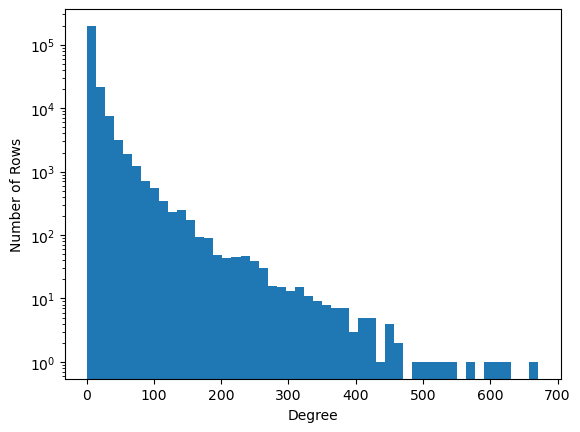

In [7]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import local_setting

base_path = local_setting.base_path

fileset = Path(base_path).rglob('*.config')

n = 0

for file in fileset:
    if file.stem[:6] == "rabbit":
        continue
    if file.stem != "collab":
        continue
    print(file.stem)
    indptr = np.fromfile(base_path + file.stem + ".graph.ptrdump", dtype=np.int32)
    indices = np.fromfile(base_path + file.stem + ".graph.edgedump", dtype=np.int32)
    num_nodes = len(indptr) - 1
    num_edges = len(indices)

    print(num_nodes)
    print(num_edges)

    # compute row degrees
    degrees = np.diff(indptr)

    print(max(degrees))
    # plot histogram
    plt.figure()
    plt.hist(degrees, bins=50, log=True)  # use log scale for better visibility if needed
    # plt.title(f'Row Degree Distribution for Collab')
    plt.xlabel('Degree')
    plt.ylabel('Number of Rows')
    plt.savefig(f'{file.stem}_histogram.pdf')  # save the figure to a file

    # If you want to display the plot directly
    # plt.show()
